In [128]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [129]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [130]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


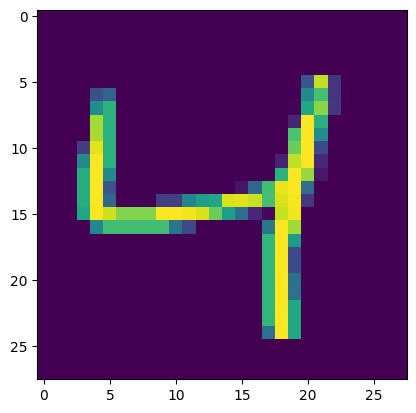

In [4]:

plt.imshow(X_train[2])

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

/Users/praveenbhandari/Desktop/mlp/mlp/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# !pip install --upgrade tensorflow

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9023 - loss: 0.7504 - val_accuracy: 0.9755 - val_loss: 0.0875
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9763 - loss: 0.0786 - val_accuracy: 0.9740 - val_loss: 0.0859
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9832 - loss: 0.0529 - val_accuracy: 0.9806 - val_loss: 0.0668
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9870 - loss: 0.0423 - val_accuracy: 0.9809 - val_loss: 0.0668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9890 - loss: 0.0331 - val_accuracy: 0.9791 - val_loss: 0.0763
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9902 - loss: 0.0301 - val_accuracy: 0.9797 - val_loss: 0.0770
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9929 - loss: 0.0210 - val_accuracy: 0.9781 - val_loss: 0.0986
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9925 -

In [63]:
import numpy as np
import random

In [162]:
class neuron():
    def __init__(self,bias):
        self.bias=bias
        self.weights=[]

    # def sigmoid(self,x):
    #     return 1/(1+np.exp(-x))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -100, 100)))  # Clipping inputs to avoid large values

    
    def sum_input_to_hiddedn(self):
        sum=0
        for i in range(len(self.input)):
            sum += self.input[i]*self.weights[i]
            # print(sum)
        return sum+self.bias
    
    

    def cost(self,input):
        self.input=input
        self.output=self.sigmoid(self.sum_input_to_hiddedn())
        # print(self.output)
        return self.output
    
    def cal_error(self,target_op):
        return 0.5*np.square(target_op-self.output)
    
    def error_wrt_output(self, targer_op):
        return -(targer_op-self.output)


    def error_wrt_input(self):
        return self.output*(1-self.output)

    def total_error(self,targer_op):
        return self.error_wrt_input()*self.error_wrt_output(targer_op)
    

    # def error_wrt_weight(self,index):
    #     return self.input[index]

    

In [163]:
class network():
    def __init__(self,hidden_layer,bias):
        self.network=[]
        self.bias = bias if bias is not None else random.random()
        for _ in range(hidden_layer):
            self.network.append(neuron(self.bias))

    def forward(self,input):
        outputs=[]
        for i in self.network:
            outputs.append(i.cost(input))
        return outputs
    

    # def backPropogation(self,):
        

In [173]:
class all_network():
    def __init__(self,n_input_layer,n_hidden_layer,n_output_layer,hidden_weights,output_weights,hidden_bias,output_bias):
        self.hidden_l_network=network(n_hidden_layer,hidden_bias)
        self.output_l_network=network(n_output_layer,output_bias)
        self.n_input_layer=n_input_layer
        # self.hidden_weight_layer=self.add_weights_to_hidden(hidden_weights)
        # self.output_weight_layer=self.add_weights_to_output(output_weights)
        self.add_weights(self.hidden_l_network,hidden_weights,n_input_layer)
        self.add_weights(self.output_l_network,output_weights,n_hidden_layer)


    def add_weights(self, layer, weight, num_inputs):
        count = 0
        for neuron in layer.network:
            for _ in range(num_inputs):
                neuron.weights.append(weight[count])
                count += 1

    # def add_weights_to_output(self,output_weights):
    #     count=0
    #     for i in range(len(self.output_l_network.network)):
    #         # print(hidden_l_network.network[i].weight)
    #         for j in range((self.n_input_layer)):
    #             self.output_l_network.network[i].weight.append(output_weights[count])
    #             count+=1

    def forward_hidden_op(self,input_data):
        # hidden_op=self.hidden_l_network.forward(input_data)
        # self.hidden_l_cost=self.hidden_l_network.forward(input_data)
        # print("Hidden layer outputs:", self.hidden_l_cost)
        # self.output_l_cost=self.output_l_network.forward(self.hidden_l_cost)
        # print("Output layer outputs:", self.output_l_cost)  # Print output layer outputs
        hidden_output = self.hidden_l_network.forward(input_data)
        # print(f"Hidden Layer Output: {hidden_output}")
        output = self.output_l_network.forward(hidden_output)
        # print(f"Output Layer Output: {output}")

        return output
    
    def backPropogation(self, input_data, target_op,learning_rate=0.5):
        # Output layer deltas
        # self.forward_hidden_op(target_inp)
        hidden_output = self.hidden_l_network.forward(input_data)
        final_output = self.output_l_network.forward(hidden_output)

        # output_deltas = [0] * len(self.output_l_network.network)
        # for i in range(len(self.output_l_network.network)):
        #     output_deltas[i] = self.output_l_network.network[i].cal_error(target_op[i])

        output_deltas = []
        for i in range(len(target_op)):
            error_wrt_input = self.output_l_network.network[i].error_wrt_input()
            output_deltas.append((target_op[i] - final_output[i]) * error_wrt_input)

        # Hidden layer deltas
        hidden_deltas = []
        for i in range(len(self.hidden_l_network.network)):
            # Calculate the weighted sum of output deltas for the current hidden layer neuron
            weighted_sum = 0
            for j in range(len(self.output_l_network.network)):
                weighted_sum += output_deltas[j] * self.output_l_network.network[j].weights[i]
            
            # Multiply the weighted sum by the error with respect to the input
            hidden_deltas.append(weighted_sum * self.hidden_l_network.network[i].error_wrt_input())

        # Update output weights and biases
        for i, neuron in enumerate(self.output_l_network.network):
            for j in range(len(neuron.weights)):
                neuron.weights[j] += learning_rate * output_deltas[i] * hidden_output[j]
            neuron.bias += learning_rate * output_deltas[i]
  

        # Update hidden weights and biases
        for i, neuron in enumerate(self.hidden_l_network.network):
            for j in range(len(neuron.weights)):
                neuron.weights[j] += learning_rate * hidden_deltas[i] * input_data[j]
            neuron.bias += learning_rate * hidden_deltas[i]



    def calculate_total_error(self, dataset):
        total_error = 0
        for input_data, target_op in dataset:
            outputs = self.forward_hidden_op(input_data)
            total_error += sum(0.5 * (target_op[i] - outputs[i]) ** 2 for i in range(len(target_op)))
        return total_error




            
        # // TODO: hidden layer delta calculations using chain rule
        # for i in range(len(self.hidden_l_network.network)):
        #     d=0
        #     for j in range(len(self.output_l_network.network)):
        #         # error_at_hidden_layer[i] = self.hidden_l_network[i].total_error(target_inp[i])
        #         d=error_at_op[i]*self.output_l_network.network[j].weights[i]
        #     error_at_hidden_layer[i] = d*self.hidden_l_network.network[i].error_wrt_input()

        
        # for i in range(len(self.output_l_network.network)):
        #     for j in range(len(self.hidden_l_network.network[i].weights)):
        #         error_wrt_weight=error_at_op * self.output_l_network.network[i].error_wrt_weight(j)
        #         self.hidden_l_network.network[i].weight[j]-= 0.5*error_wrt_weight



        # for i in range(len(self.hidden_l_network.network)):
        #     for j in range(len(self.hidden_l_network.network[i].weights)):
        #         error_wrt_weight=error_at_hidden_layer * self.hidden_l_network.network[i].error_wrt_weight(j)
        #         self.output_l_network.network[i].weight[j]-= 0.5*error_wrt_weight





In [177]:
nn = all_network(2, 2, 2, hidden_weights=[0.15, 0.2, 0.25, 0.3], hidden_bias=0.35, output_weights=[0.4, 0.45, 0.5, 0.55], output_bias=0.6)

# dataset = [([0.05, 0.1], [0.01, 0.99])]

# for epoch in range(100):
#     nn.backPropogation([0.05, 0.1], [0.01, 0.99])
#     if epoch % 10 == 0:
#         print(f"Epoch {epoch}: Error = {nn.calculate_total_error(dataset)}")
# errors = []
# for i in range(10):
nn.forward_hidden_op([0.05, 0.1])
#     error = round(nn.calculate_total_error([([0.05, 0.1], [0.01, 0.99])]), 9)
#     errors.append(error)
#     # print(i, round(nn.calculate_total_error([[[0.05, 0.1], [0.01, 0.99]]]), 9))
#     print(i,error)
# plt.plot(range(10), errors)
# plt.xlabel('Epoch')
# plt.ylabel('Error')
# plt.title('Error Loss Over Epochs')
# plt.show()

[np.float64(0.7513650695523157), np.float64(0.7729284653214625)]

0 0.280471447
1 0.261907623
2 0.242935433
3 0.223873213
4 0.205075318
5 0.186895748
6 0.169649683
7 0.153582241
8 0.138851411
9 0.125527038


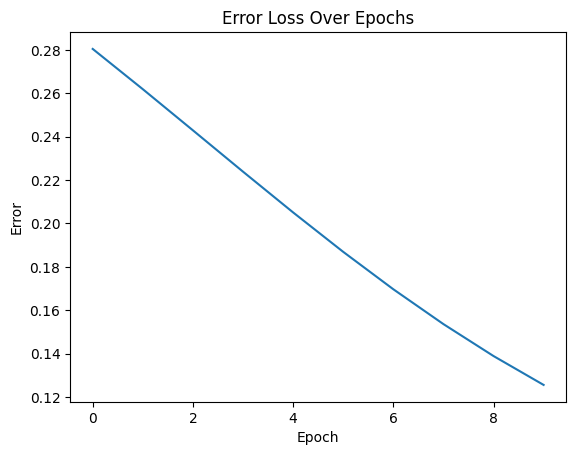

In [174]:
nn = all_network(2, 2, 2, hidden_weights=[0.15, 0.2, 0.25, 0.3], hidden_bias=0.35, output_weights=[0.4, 0.45, 0.5, 0.55], output_bias=0.6)

# dataset = [([0.05, 0.1], [0.01, 0.99])]

# for epoch in range(100):
#     nn.backPropogation([0.05, 0.1], [0.01, 0.99])
#     if epoch % 10 == 0:
#         print(f"Epoch {epoch}: Error = {nn.calculate_total_error(dataset)}")
errors = []
for i in range(10):
    nn.backPropogation([0.05, 0.1], [0.01, 0.99])
    error = round(nn.calculate_total_error([([0.05, 0.1], [0.01, 0.99])]), 9)
    errors.append(error)
    # print(i, round(nn.calculate_total_error([[[0.05, 0.1], [0.01, 0.99]]]), 9))
    print(i,error)
plt.plot(range(10), errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Loss Over Epochs')
plt.show()

In [ ]:
# inp_lay=784
# hidden_lay=64
# op_lay=10
# hidden_weights=np.random.rand(inp_lay * hidden_lay)
# output_weights = np.random.rand(op_lay * hidden_lay)
# hid_bias=np.random.rand()
# op_bias=np.random.rand()
# # print(len(hidden_weights))
# # print(len(output_weights))
# # print(op_bias)

In [ ]:
inp_lay=784
hidden_lay=64
op_lay=10
hidden_weights=np.random.rand(inp_lay * hidden_lay)*0.1
output_weights = np.random.rand(op_lay * hidden_lay)*0.1
hid_bias=np.random.rand()
op_bias=np.random.rand()
mnist_network = all_network(inp_lay, hidden_lay, op_lay,hidden_weights, output_weights, hid_bias, op_bias)
input_data = np.random.rand(inp_lay)  # Random input data (e.g., 784 features for one image)
target_op = np.random.rand(op_lay)  # Random target output (e.g., 10 classes)

# epochs = 5
# for epoch in range(epochs):
#     mnist_network.backPropogation(input_data, target_op, learning_rate=0.01)
#     error = mnist_network.calculate_total_error([(input_data, target_op)])
#     print(f"Total error: {error}")
# epochs = 10
# learning_rate = 0.1


Total error: 1.8494164482653392
Total error: 1.8471772230008374
Total error: 1.8448686181822578
Total error: 1.8424872127359029
Total error: 1.8400293558312852


In [133]:
X_train[0].shape
X_train[1].shape

(28, 28)

In [135]:
# print(X_train.shape)
# print(X_test.shape)

In [137]:
# X_train.shape

In [ ]:
# X_train.reshape(-1).shape

(47040000,)

In [114]:
# X_train_flattened = X_train.reshape(X_train.shape[0], -1)
# X_train_flattened.shape

In [115]:
# X_train_flattened[i]

In [116]:
# !pip install scikit-learn

In [138]:
# input_data = X_train.reshape(784,)
# input_data.shape
X_train_flattened = X_train.reshape(-1, 784) / 255.0
X_train_flattened.shape
from sklearn.preprocessing import OneHotEncoder
# Instantiate the encoder with sparse_output set to False
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the labels into one-hot encoded format
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))

In [139]:
# len(X_train_flattened[:100])

In [194]:
import matplotlib.pyplot as plt

for e in range(5):
    total_error = 0
    for i in range(len(X_train_flattened[:100])):
        # Print the current image index being trained on
        # print(f"Training on image {i + 1}/{len(X_train_flattened[:1000])}")
        
        # Display the current training image
        # if i % 100 == 0:  # Display every 100th image to avoid too many outputs
        #     plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
        #     plt.title(f"Training Image: {i + 1}")
        #     plt.show()

        # Backpropagation for the current image
        mnist_network.backPropogation(X_train_flattened[i], y_train_one_hot[i], 0.1)
        total_error += mnist_network.calculate_total_error([(X_train_flattened[i], y_train_one_hot[i])])

    print(f"Epoch {e + 1}/{e}, Total Error: {total_error}")


Epoch 1/0, Total Error: 41.501184029702124
Epoch 2/1, Total Error: 41.922311938822745
Epoch 3/2, Total Error: 41.93186023228132
Epoch 4/3, Total Error: 41.93198124194424
Epoch 5/4, Total Error: 41.93036595463579


In [143]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
nn = all_network(2, 2, 2, hidden_weights=[0.15, 0.2, 0.25, 0.3], hidden_bias=0.35, output_weights=[0.4, 0.45, 0.5, 0.55], output_bias=0.6)

# dataset = [([0.05, 0.1], [0.01, 0.99])]

# for epoch in range(100):
#     nn.backPropogation([0.05, 0.1], [0.01, 0.99])
#     if epoch % 10 == 0:
#         print(f"Epoch {epoch}: Error = {nn.calculate_total_error(dataset)}")
errors = []
for i in range(10):
    nn.backPropogation([0.05, 0.1], [0.01, 0.99])
    error = round(nn.calculate_total_error([([0.05, 0.1], [0.01, 0.99])]), 9)
    errors.append(error)
    # print(i, round(nn.calculate_total_error([[[0.05, 0.1], [0.01, 0.99]]]), 9))
    print(i,error)
plt.plot(range(10), errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Loss Over Epochs')
plt.show()

IndexError: index 28 is out of bounds for axis 0 with size 28